# **거주 인구 EDA**

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import font_manager, rc
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = True
import seaborn as sns

import datetime

import warnings
warnings.filterwarnings('ignore')
# pd.set_option('display.max_rows', None)

In [2]:
pop = pd.read_csv('../../../../../Source/2021 빅콘테스트/2021 빅콘테스트_ECO제주/01_제공데이터_update(210811)/03_거주인구_RESIDENT_POP.csv', encoding='cp949')
pop['base_year_month'] = pop['base_year'].astype(str) + '년 ' + pop['base_month'].astype(str) + '월'

pop

,base_year,base_month,city,emd_cd,emd_nm,sex,resid_reg_pop,foreign_pop,total_pop,base_year_month
0,2018,1,제주시,50110590,건입동,남성,5085,146,5231,2018년 1월
1,2018,1,제주시,50110590,건입동,여성,4715,82,4797,2018년 1월
2,2018,1,제주시,50110256,구좌읍,남성,7965,368,8333,2018년 1월
3,2018,1,제주시,50110256,구좌읍,여성,7609,184,7793,2018년 1월
4,2018,1,서귀포시,50130253,남원읍,남성,9806,428,10234,2018년 1월
...,...,...,...,...,...,...,...,...,...,...
3607,2021,6,제주시,50110250,한림읍,여성,10341,1140,11481,2021년 6월
3608,2021,6,제주시,50110600,화북동,남성,12062,169,12231,2021년 6월
3609,2021,6,제주시,50110600,화북동,여성,12238,161,12399,2021년 6월
3610,2021,6,서귀포시,50130550,효돈동,남성,2660,39,2699,2021년 6월


## **연도별 구분**

In [3]:
# 연도별 구분
pop_2018 = pop[pop['base_year']==2018]
pop_2019 = pop[pop['base_year']==2019]
pop_2020 = pop[pop['base_year']==2020]
pop_2021 = pop[pop['base_year']==2021]

pop_2018

,base_year,base_month,city,emd_cd,emd_nm,sex,resid_reg_pop,foreign_pop,total_pop,base_year_month
0,2018,1,제주시,50110590,건입동,남성,5085,146,5231,2018년 1월
1,2018,1,제주시,50110590,건입동,여성,4715,82,4797,2018년 1월
2,2018,1,제주시,50110256,구좌읍,남성,7965,368,8333,2018년 1월
3,2018,1,제주시,50110256,구좌읍,여성,7609,184,7793,2018년 1월
4,2018,1,서귀포시,50130253,남원읍,남성,9806,428,10234,2018년 1월
...,...,...,...,...,...,...,...,...,...,...
1027,2018,12,제주시,50110250,한림읍,여성,10319,1347,11666,2018년 12월
1028,2018,12,제주시,50110600,화북동,남성,12458,228,12686,2018년 12월
1029,2018,12,제주시,50110600,화북동,여성,12527,178,12705,2018년 12월
1030,2018,12,서귀포시,50130550,효돈동,남성,2683,57,2740,2018년 12월


In [4]:
# 2021년은 6개월까지만
pop_2021

,base_year,base_month,city,emd_cd,emd_nm,sex,resid_reg_pop,foreign_pop,total_pop,base_year_month
3096,2021,1,제주시,50110590,건입동,남성,4610,149,4759,2021년 1월
3097,2021,1,제주시,50110590,건입동,여성,4432,88,4520,2021년 1월
3098,2021,1,제주시,50110256,구좌읍,남성,7970,409,8379,2021년 1월
3099,2021,1,제주시,50110256,구좌읍,여성,7542,178,7720,2021년 1월
3100,2021,1,서귀포시,50130253,남원읍,남성,9689,463,10152,2021년 1월
...,...,...,...,...,...,...,...,...,...,...
3607,2021,6,제주시,50110250,한림읍,여성,10341,1140,11481,2021년 6월
3608,2021,6,제주시,50110600,화북동,남성,12062,169,12231,2021년 6월
3609,2021,6,제주시,50110600,화북동,여성,12238,161,12399,2021년 6월
3610,2021,6,서귀포시,50130550,효돈동,남성,2660,39,2699,2021년 6월


In [5]:
# 행정동별 인구
pop_2018_dong = (pop_2018.groupby('emd_nm')['resid_reg_pop', 'foreign_pop', 'total_pop'].sum() / 12).reset_index()   # 12개월
pop_2019_dong = (pop_2019.groupby('emd_nm')['resid_reg_pop', 'foreign_pop', 'total_pop'].sum() / 12).reset_index()   # 12개월
pop_2020_dong = (pop_2020.groupby('emd_nm')['resid_reg_pop', 'foreign_pop', 'total_pop'].sum() / 12).reset_index()   # 12개월
pop_2021_dong = (pop_2021.groupby('emd_nm')['resid_reg_pop', 'foreign_pop', 'total_pop'].sum() / 6).reset_index()    # 6개월

pop_2018_dong

,emd_nm,resid_reg_pop,foreign_pop,total_pop
0,건입동,9749.750000,243.416667,9993.166667
1,구좌읍,15647.916667,585.416667,16233.333333
2,남원읍,19156.750000,680.833333,19837.583333
3,노형동,53596.333333,1950.000000,55546.333333
4,대륜동,13777.166667,187.500000,13964.666667
5,대정읍,21290.583333,1600.500000,22891.083333
6,대천동,13445.250000,245.833333,13691.083333
7,도두동,3060.750000,124.333333,3185.083333
8,동홍동,22779.583333,1258.166667,24037.750000
9,봉개동,4086.750000,81.583333,4168.333333


In [6]:
pop_2018_dong.to_csv('2018년 행정동별 거주 인구.csv', index=False)
pop_2019_dong.to_csv('2019년 행정동별 거주 인구.csv', index=False)
pop_2020_dong.to_csv('2020년 행정동별 거주 인구.csv', index=False)
pop_2021_dong.to_csv('2021년 행정동별 거주 인구.csv', index=False)

**'음식 관련 카드 소비.ipynb'에서 이어서 EDA 진행**

## **월/행정동별 거주 인구 변동 추이**

In [7]:
pop_month_dong = pop.sort_values(by=['emd_nm', 'base_year', 'base_month']).reset_index(drop=True)

pop_month_dong

,base_year,base_month,city,emd_cd,emd_nm,sex,resid_reg_pop,foreign_pop,total_pop,base_year_month
0,2018,1,제주시,50110590,건입동,남성,5085,146,5231,2018년 1월
1,2018,1,제주시,50110590,건입동,여성,4715,82,4797,2018년 1월
2,2018,2,제주시,50110590,건입동,남성,5090,142,5232,2018년 2월
3,2018,2,제주시,50110590,건입동,여성,4724,82,4806,2018년 2월
4,2018,3,제주시,50110590,건입동,남성,5072,141,5213,2018년 3월
...,...,...,...,...,...,...,...,...,...,...
3607,2021,4,서귀포시,50130550,효돈동,여성,2607,19,2626,2021년 4월
3608,2021,5,서귀포시,50130550,효돈동,남성,2661,41,2702,2021년 5월
3609,2021,5,서귀포시,50130550,효돈동,여성,2605,19,2624,2021년 5월
3610,2021,6,서귀포시,50130550,효돈동,남성,2660,39,2699,2021년 6월


In [8]:
# 남성 거주 인구 DataFrame
pop_month_dong_male = pop_month_dong[pop_month_dong['sex']=='남성'].reset_index(drop=True)

pop_month_dong_male

,base_year,base_month,city,emd_cd,emd_nm,sex,resid_reg_pop,foreign_pop,total_pop,base_year_month
0,2018,1,제주시,50110590,건입동,남성,5085,146,5231,2018년 1월
1,2018,2,제주시,50110590,건입동,남성,5090,142,5232,2018년 2월
2,2018,3,제주시,50110590,건입동,남성,5072,141,5213,2018년 3월
3,2018,4,제주시,50110590,건입동,남성,5070,143,5213,2018년 4월
4,2018,5,제주시,50110590,건입동,남성,5070,148,5218,2018년 5월
...,...,...,...,...,...,...,...,...,...,...
1801,2021,2,서귀포시,50130550,효돈동,남성,2673,44,2717,2021년 2월
1802,2021,3,서귀포시,50130550,효돈동,남성,2653,41,2694,2021년 3월
1803,2021,4,서귀포시,50130550,효돈동,남성,2660,40,2700,2021년 4월
1804,2021,5,서귀포시,50130550,효돈동,남성,2661,41,2702,2021년 5월


In [9]:
# 여성 거주 인구 DataFrame
pop_month_dong_female = pop_month_dong[pop_month_dong['sex']=='여성'].reset_index(drop=True)

pop_month_dong_female

,base_year,base_month,city,emd_cd,emd_nm,sex,resid_reg_pop,foreign_pop,total_pop,base_year_month
0,2018,1,제주시,50110590,건입동,여성,4715,82,4797,2018년 1월
1,2018,2,제주시,50110590,건입동,여성,4724,82,4806,2018년 2월
2,2018,3,제주시,50110590,건입동,여성,4711,81,4792,2018년 3월
3,2018,4,제주시,50110590,건입동,여성,4718,86,4804,2018년 4월
4,2018,5,제주시,50110590,건입동,여성,4730,90,4820,2018년 5월
...,...,...,...,...,...,...,...,...,...,...
1801,2021,2,서귀포시,50130550,효돈동,여성,2616,21,2637,2021년 2월
1802,2021,3,서귀포시,50130550,효돈동,여성,2609,20,2629,2021년 3월
1803,2021,4,서귀포시,50130550,효돈동,여성,2607,19,2626,2021년 4월
1804,2021,5,서귀포시,50130550,효돈동,여성,2605,19,2624,2021년 5월


In [10]:
# 남성+여성 거주 인구 DataFrame
# pop_month_dong_total = pd.merge(pop_month_dong_male, pop_month_dong_female, how='left', left_on='base_year_month', right_on='base_year_month')
pop_month_dong_total = pop_month_dong_male
pop_month_dong_total['sex'] = '남성+여성'
pop_month_dong_total['resid_reg_pop'] = pop_month_dong_male['resid_reg_pop'] + pop_month_dong_female['resid_reg_pop']
pop_month_dong_total['foreign_pop'] = pop_month_dong_male['foreign_pop'] + pop_month_dong_female['foreign_pop']
pop_month_dong_total['total_pop'] = pop_month_dong_male['total_pop'] + pop_month_dong_female['total_pop']

pop_month_dong_total

,base_year,base_month,city,emd_cd,emd_nm,sex,resid_reg_pop,foreign_pop,total_pop,base_year_month
0,2018,1,제주시,50110590,건입동,남성+여성,9800,228,10028,2018년 1월
1,2018,2,제주시,50110590,건입동,남성+여성,9814,224,10038,2018년 2월
2,2018,3,제주시,50110590,건입동,남성+여성,9783,222,10005,2018년 3월
3,2018,4,제주시,50110590,건입동,남성+여성,9788,229,10017,2018년 4월
4,2018,5,제주시,50110590,건입동,남성+여성,9800,238,10038,2018년 5월
...,...,...,...,...,...,...,...,...,...,...
1801,2021,2,서귀포시,50130550,효돈동,남성+여성,5289,65,5354,2021년 2월
1802,2021,3,서귀포시,50130550,효돈동,남성+여성,5262,61,5323,2021년 3월
1803,2021,4,서귀포시,50130550,효돈동,남성+여성,5267,59,5326,2021년 4월
1804,2021,5,서귀포시,50130550,효돈동,남성+여성,5266,60,5326,2021년 5월


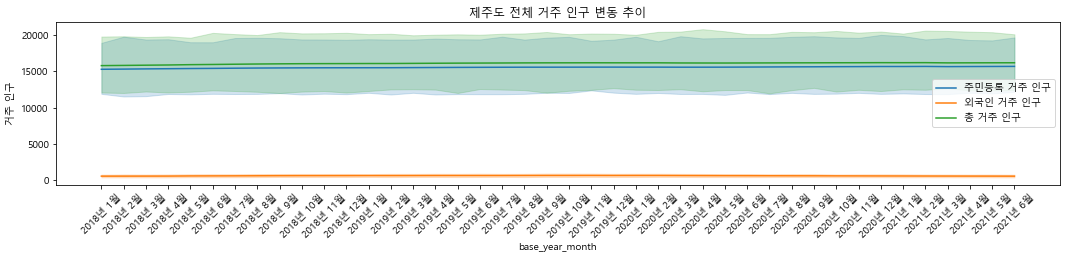

In [11]:
plt.figure(figsize=(18, 3))
# sns.set(rc={'figure.figsize':(18, 3)})   # 한글 깨짐

sns.lineplot(data=pop_month_dong_total, x='base_year_month', y='resid_reg_pop')
sns.lineplot(data=pop_month_dong_total, x='base_year_month', y='foreign_pop')
sns.lineplot(data=pop_month_dong_total, x='base_year_month', y='total_pop')
plt.xticks(rotation=45)
plt.ylabel('거주 인구')
plt.title('제주도 전체 거주 인구 변동 추이')
plt.legend(labels=['주민등록 거주 인구', '외국인 거주 인구', '총 거주 인구'])

plt.show()

In [12]:
### 뒤에 초록색으로 나오는 영역은 뭐지...? ###

**전체 비율로 볼 때 수가 적은 외국인 거주 인구는 쓰레기 배출량에 큰 영향을 미치지 않을 것으로 생각**

In [13]:
dong_list = list(pop.emd_nm.unique())

dong_list

['건입동',
 '구좌읍',
 '남원읍',
 '노형동',
 '대륜동',
 '대정읍',
 '대천동',
 '도두동',
 '동홍동',
 '봉개동',
 '삼도1동',
 '삼도2동',
 '삼양동',
 '서홍동',
 '성산읍',
 '송산동',
 '아라동',
 '안덕면',
 '애월읍',
 '연동',
 '영천동',
 '예래동',
 '오라동',
 '외도동',
 '용담1동',
 '용담2동',
 '우도면',
 '이도1동',
 '이도2동',
 '이호동',
 '일도1동',
 '일도2동',
 '정방동',
 '조천읍',
 '중문동',
 '중앙동',
 '천지동',
 '추자면',
 '표선면',
 '한경면',
 '한림읍',
 '화북동',
 '효돈동']

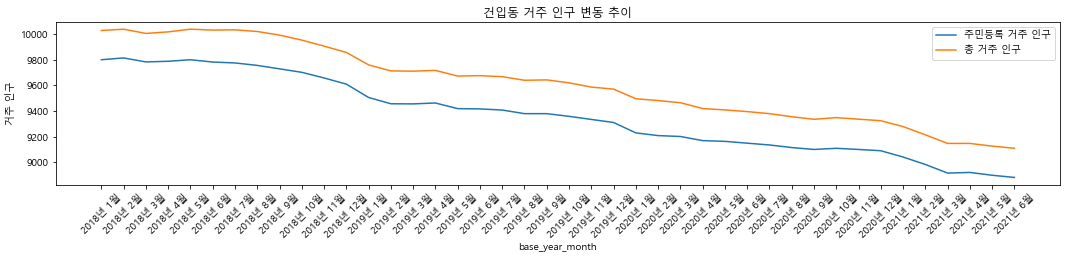

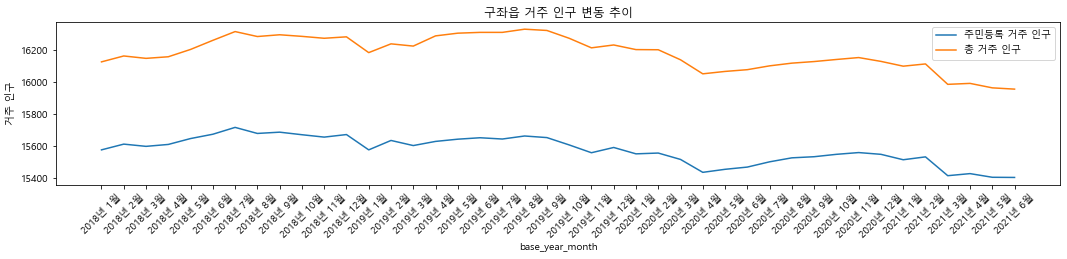

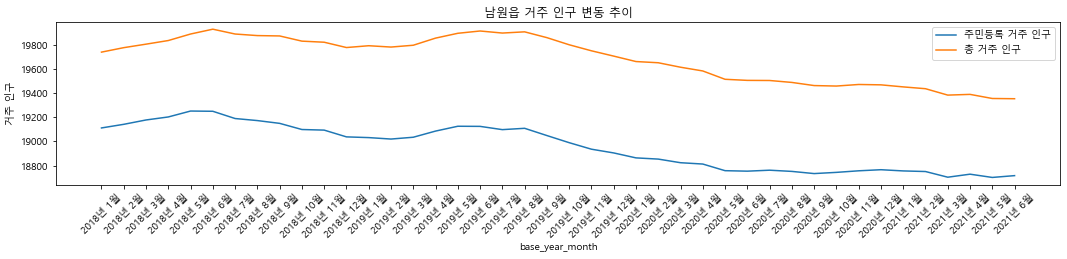

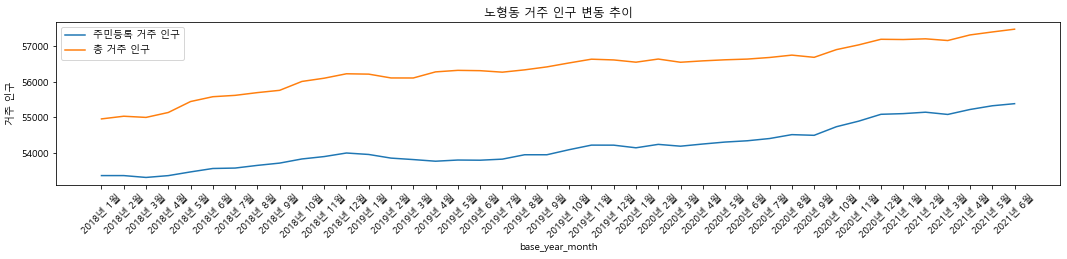

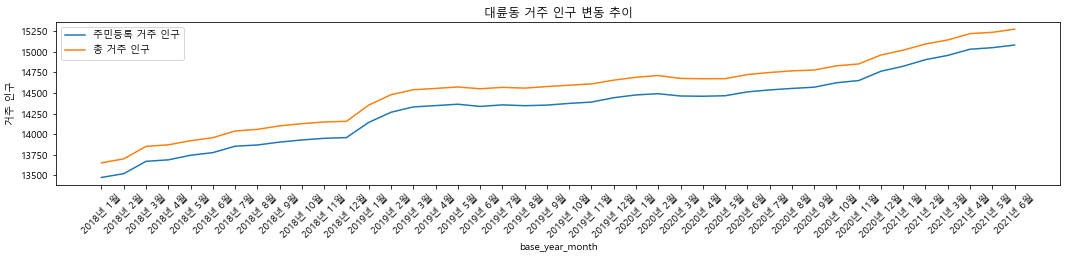

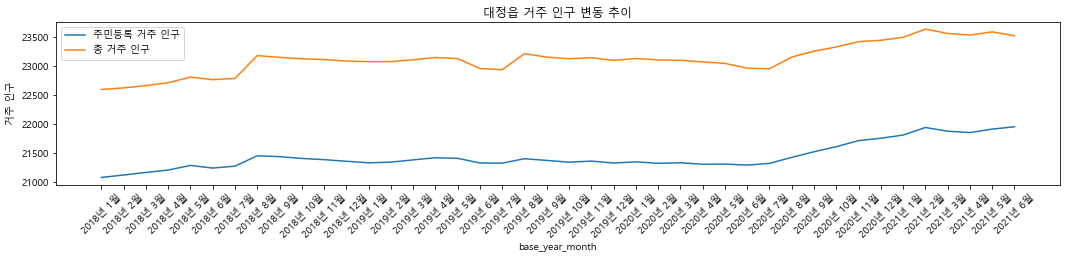

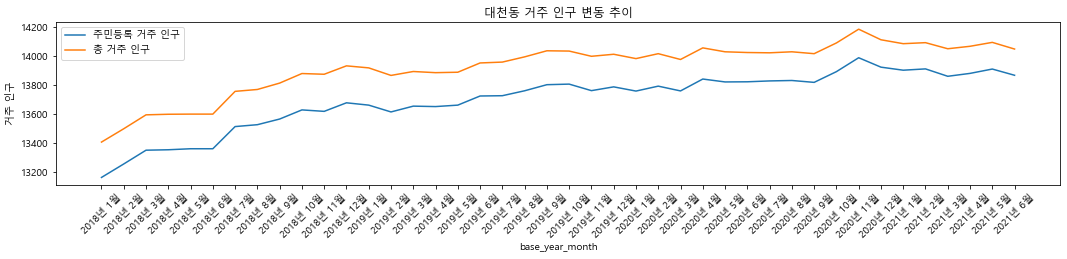

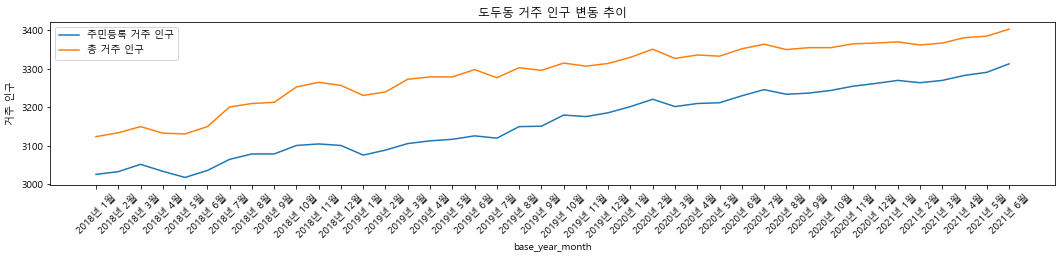

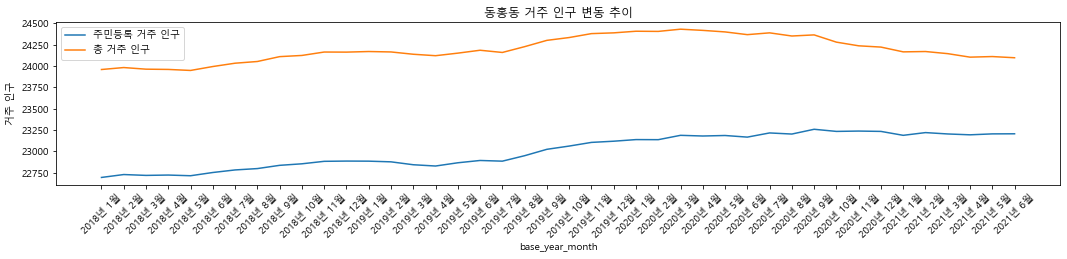

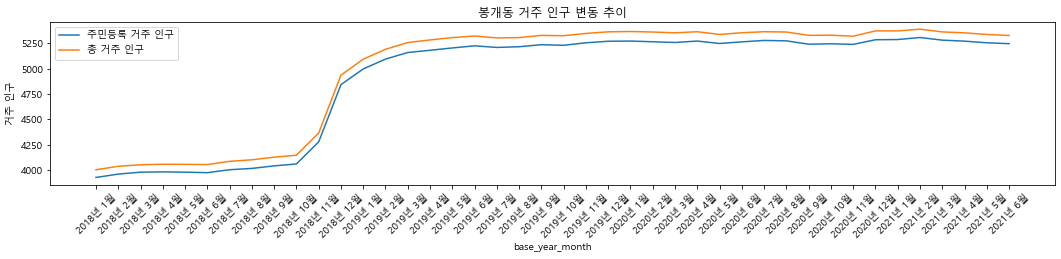

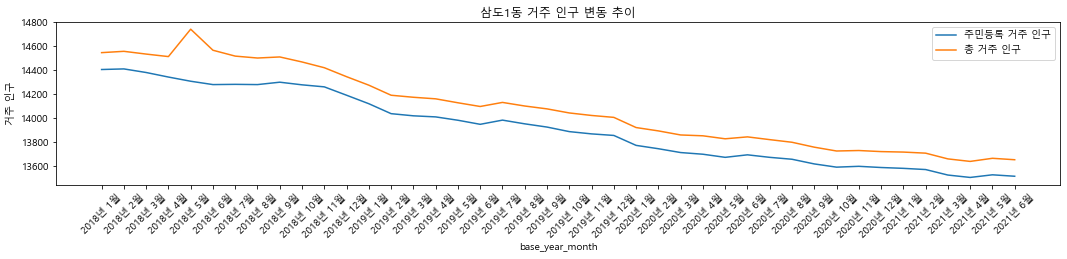

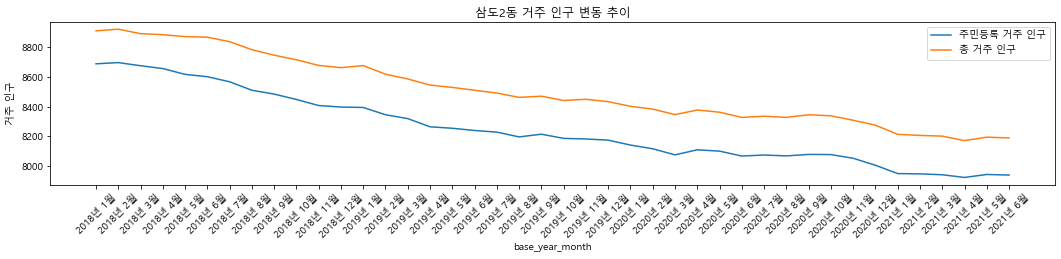

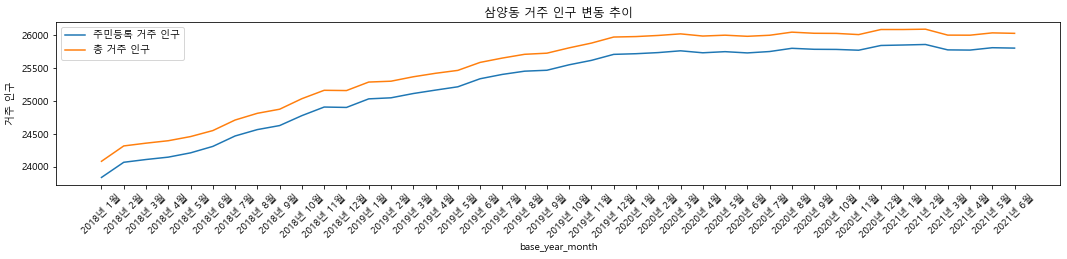

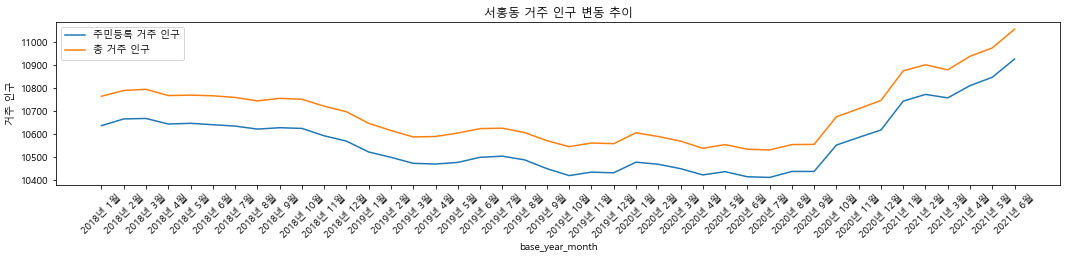

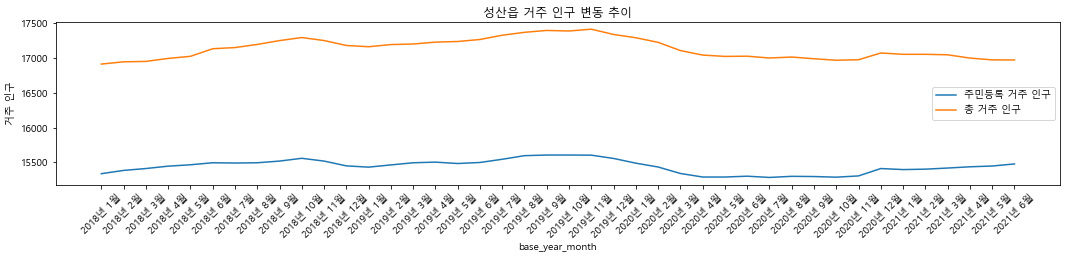

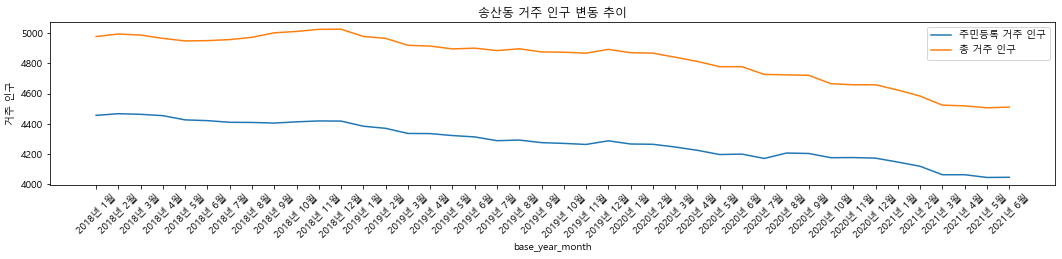

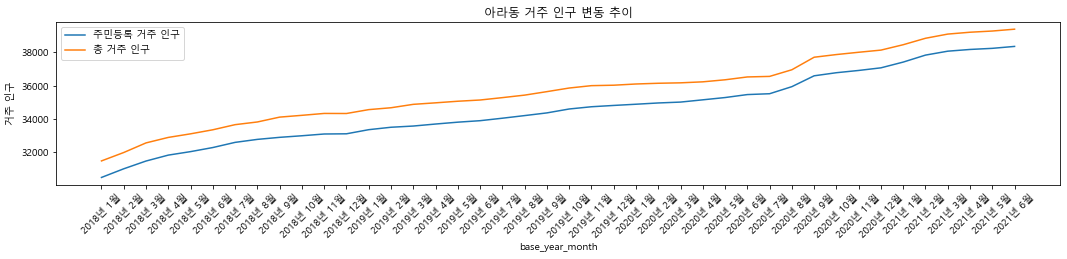

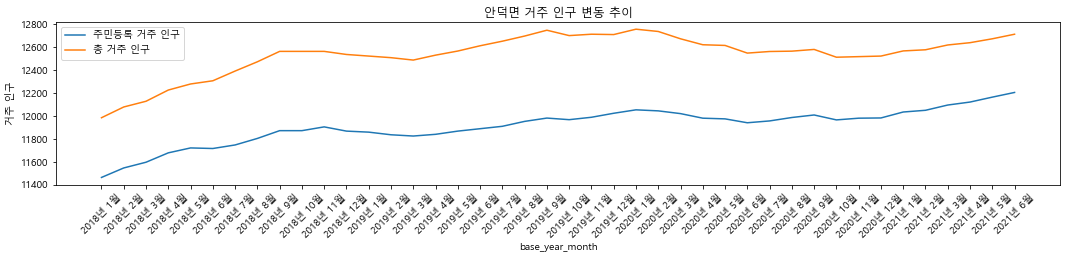

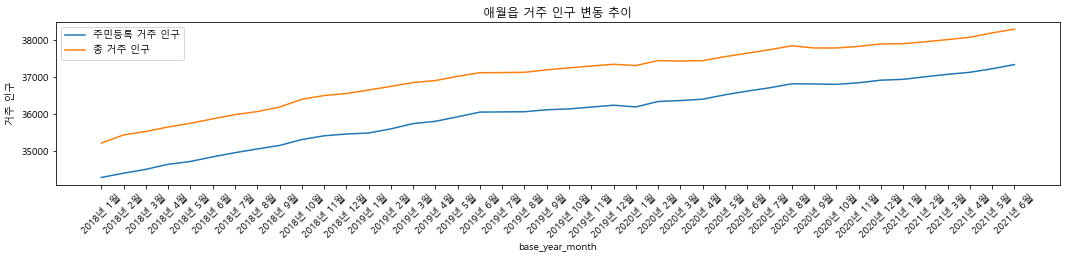

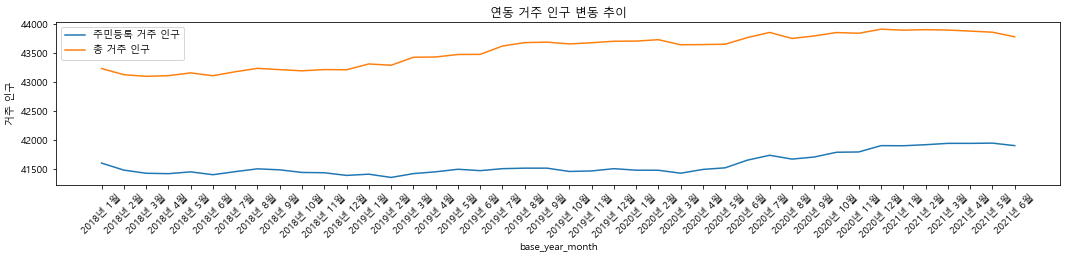

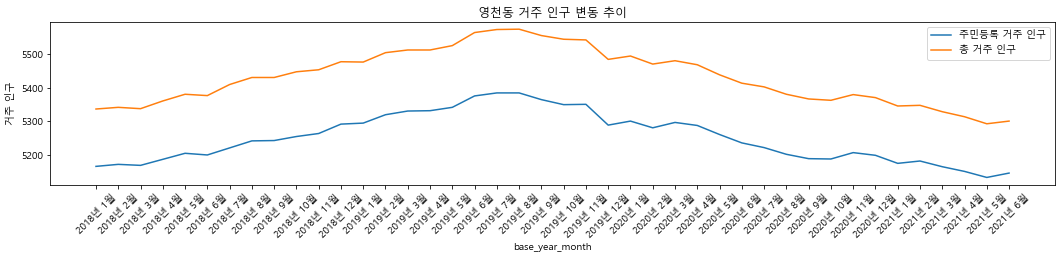

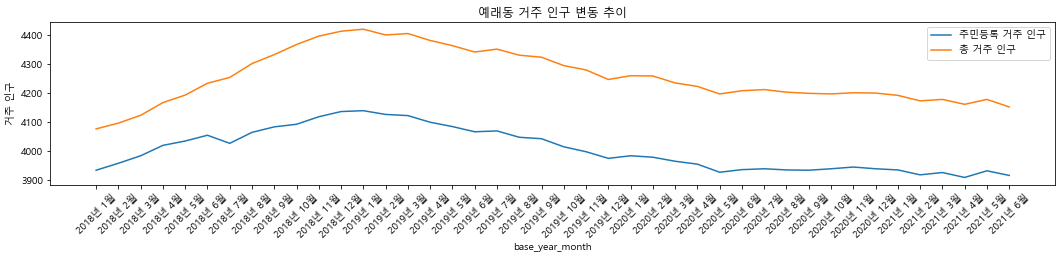

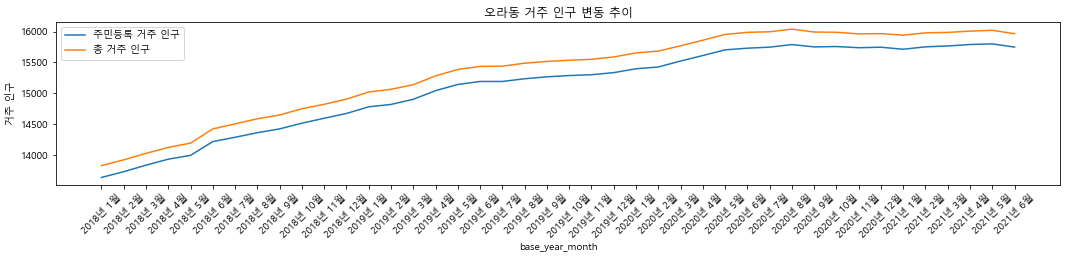

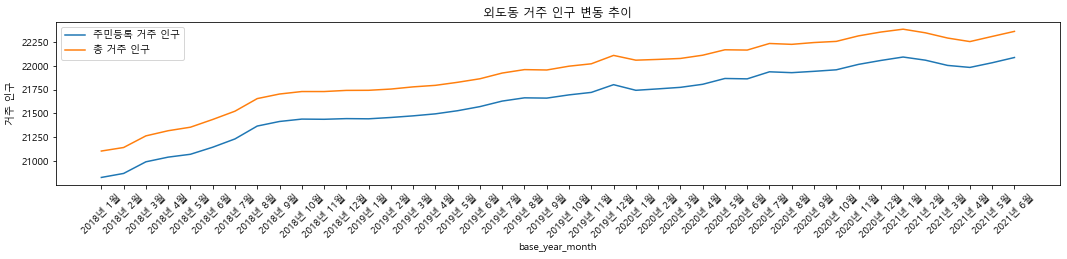

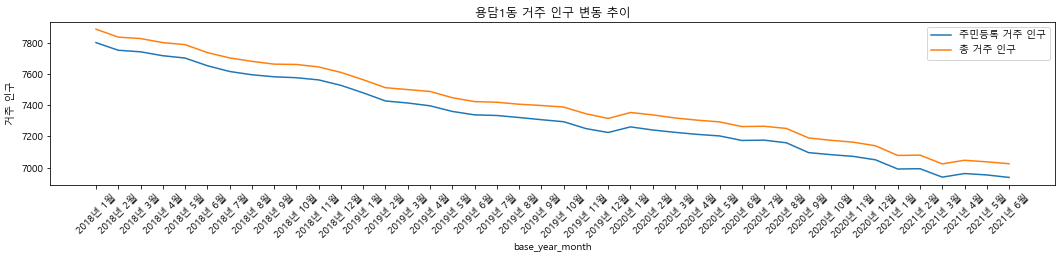

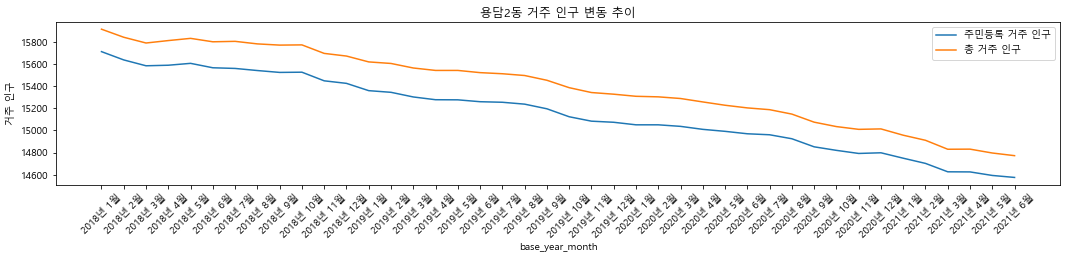

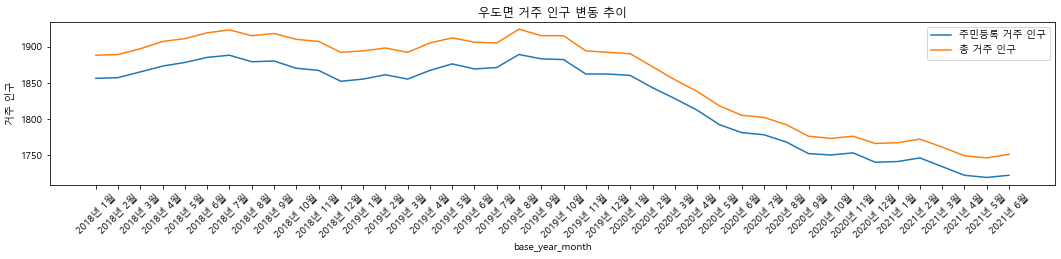

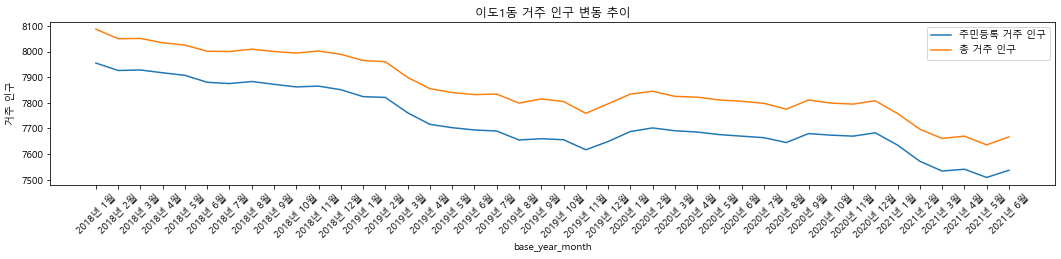

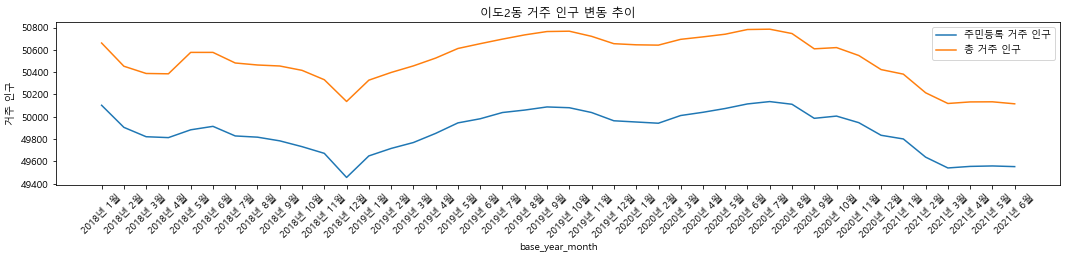

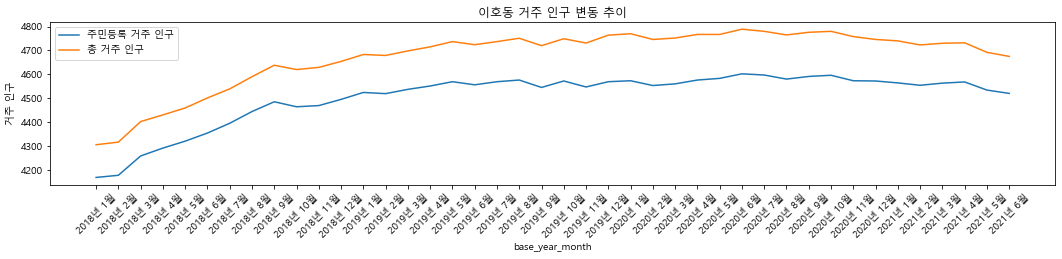

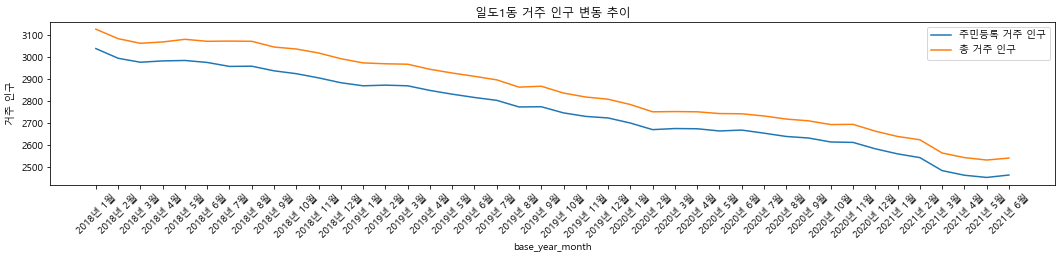

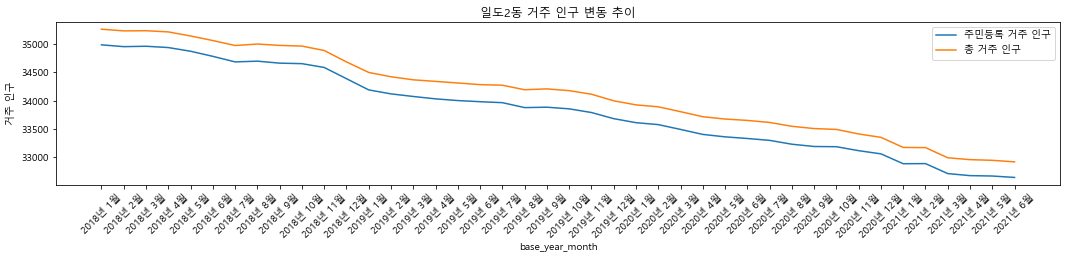

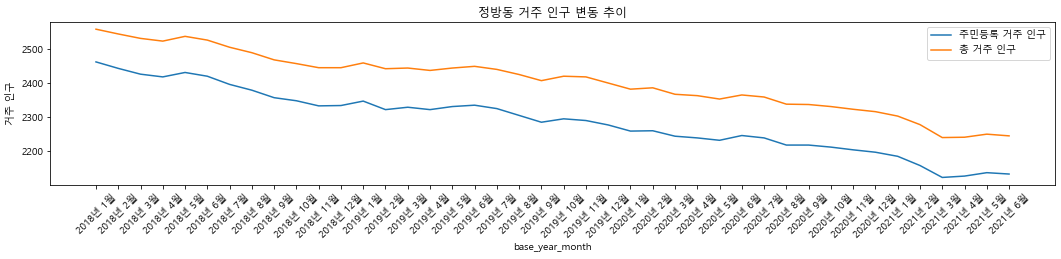

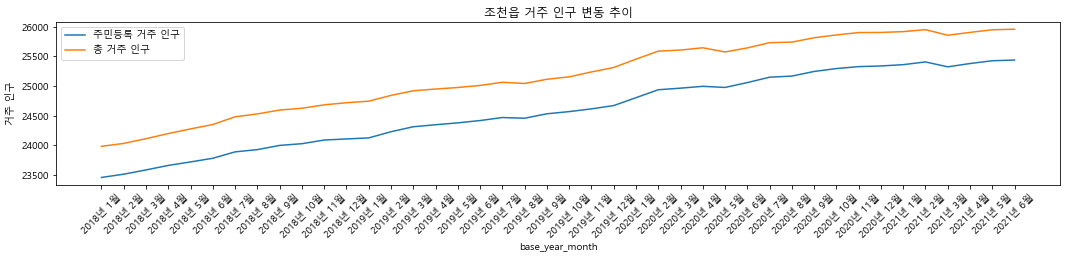

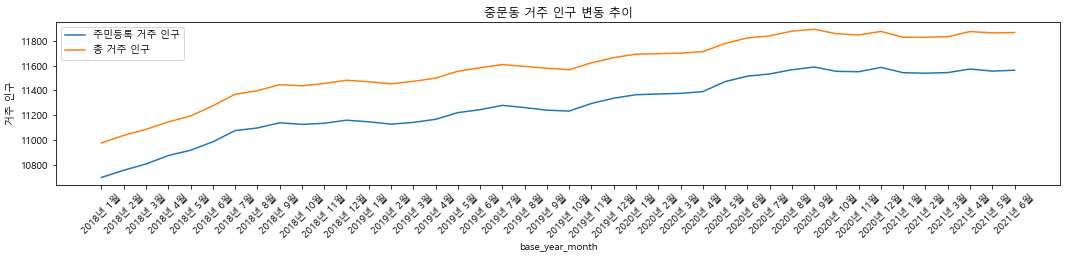

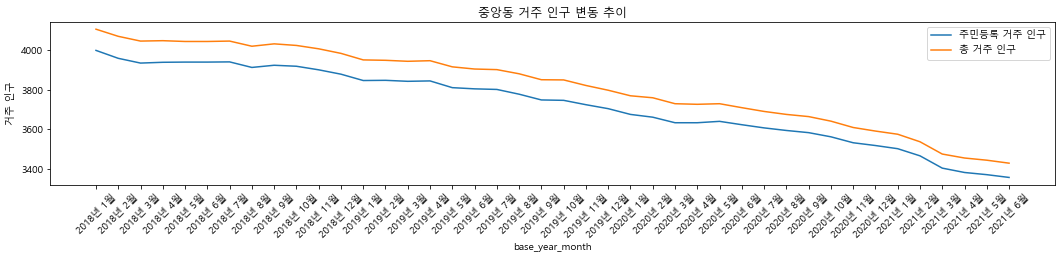

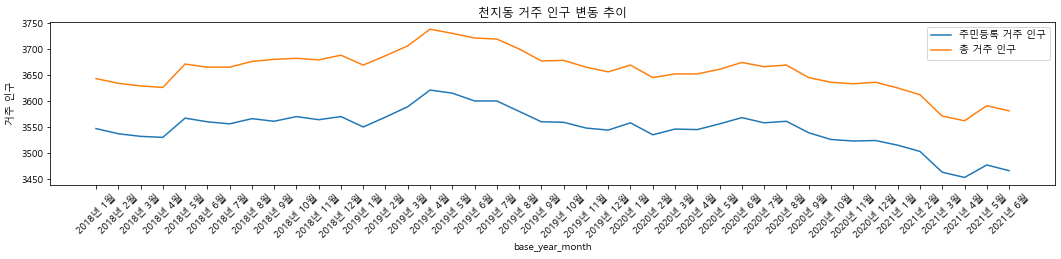

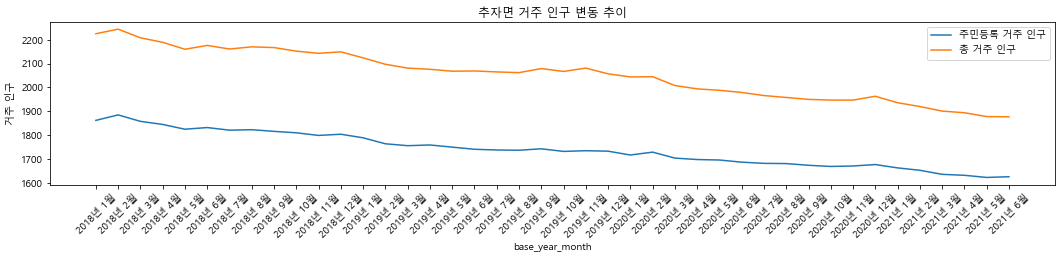

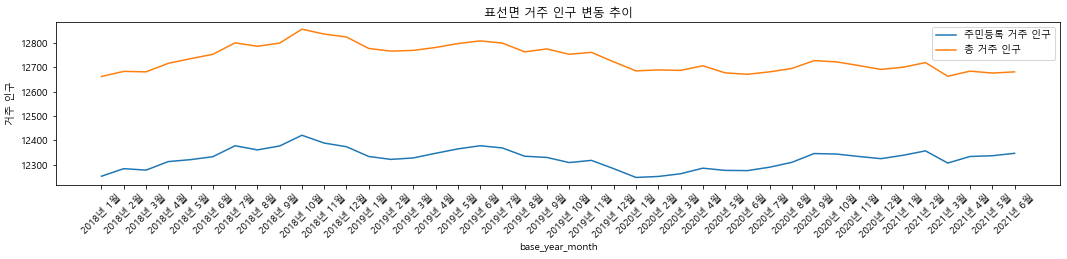

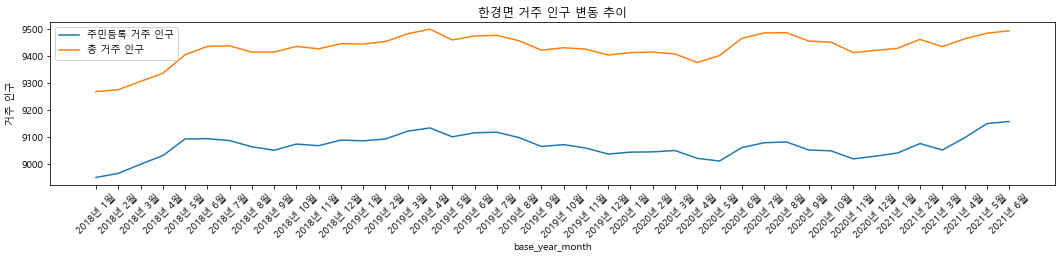

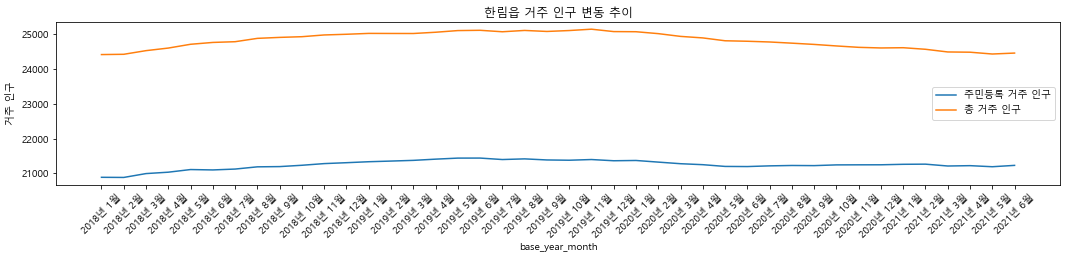

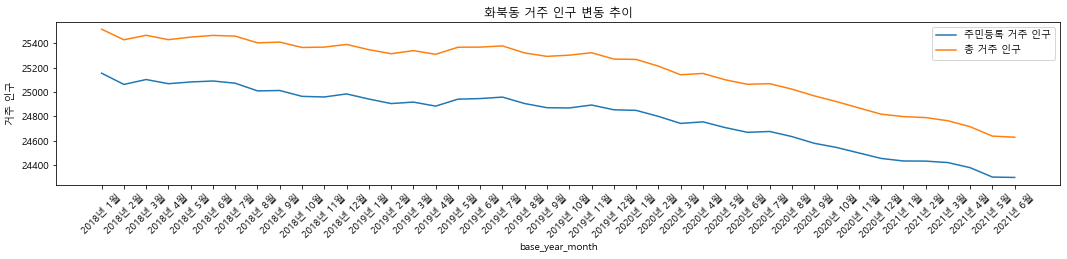

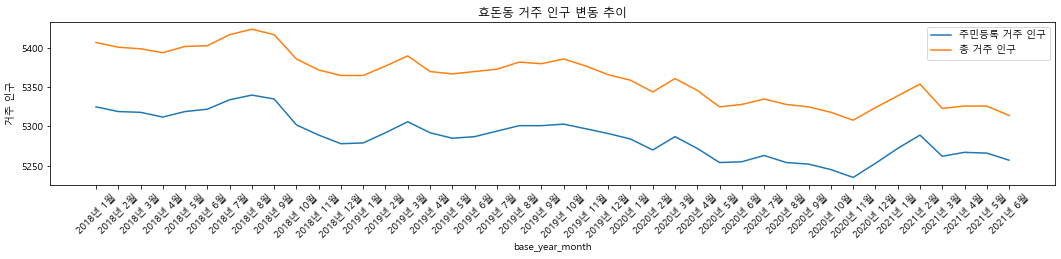

In [14]:
for i in range(len(dong_list)):
    dong = dong_list[i]
    
    plt.figure(figsize=(18, 3))
    
    sns.lineplot(data=pop_month_dong_total[i*42:i*42+42], x='base_year_month', y='resid_reg_pop')
    # sns.lineplot(data=pop_month_dong_total[i*42:i*42+42], x='base_year_month', y='foreign_pop')   # 외국인 거주 인구는 그래프에서 제외
    sns.lineplot(data=pop_month_dong_total[i*42:i*42+42], x='base_year_month', y='total_pop')
    plt.xticks(rotation=45)
    plt.ylabel('거주 인구')
    plt.title(dong + ' ' + '거주 인구 변동 추이')
    plt.legend(labels=['주민등록 거주 인구', '총 거주 인구'])
    
    plt.show()

**<span style="color:orange">행정동별로 거주 인구 증가 or 감소 여부 확인해서 분석 적용할 방법 고려</span>**